# Imports 

In [1]:
import math

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn.linear_model import Lasso

/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/eldmitro/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate 

In [4]:
from sklearn.linear_model import LinearRegression

---

# Preloading

---

# Directories

---

# Preprocessing

---

# Methods

In [64]:
def PolynomFeatures(X, deg):
    assert X.shape[1] == 1
    X_res = np.ones(shape=X.shape)
    
    for i in range(1, deg + 1):
        X_res = np.hstack((X ** i, X_res))
        
    return X_res

# Exercise 1

## 1

In [31]:
noise = np.random.normal(size=20)
x = np.random.uniform(0, 2 * math.pi, 20)
sin_x = np.sin(x)

In [32]:
X_train = x[np.newaxis].T
y_train = sin_x + noise

In [33]:
X_train = np.hstack((X_train, np.ones(shape=(20, 1))))

In [48]:
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

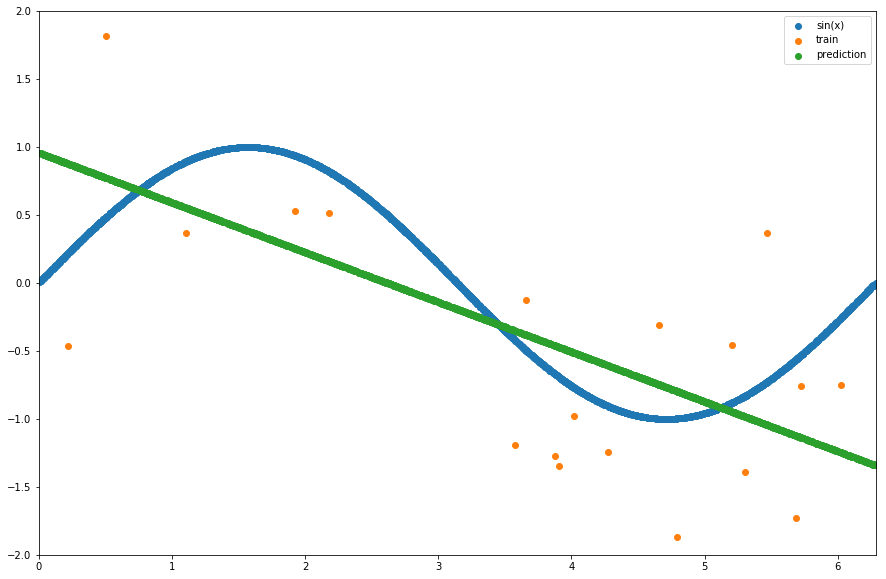

In [51]:
x_plotting = np.random.uniform(0, 2 * math.pi, 3000)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train, label='train')

pred = lin_model.coef_[0] * (x_plotting) + lin_model.coef_[1]
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

## 3

In [66]:
X_train_3 = PolynomFeatures(x[np.newaxis].T, 3)
y_train_3 = y_train

In [68]:
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X=X_train_3, y=y_train_3)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

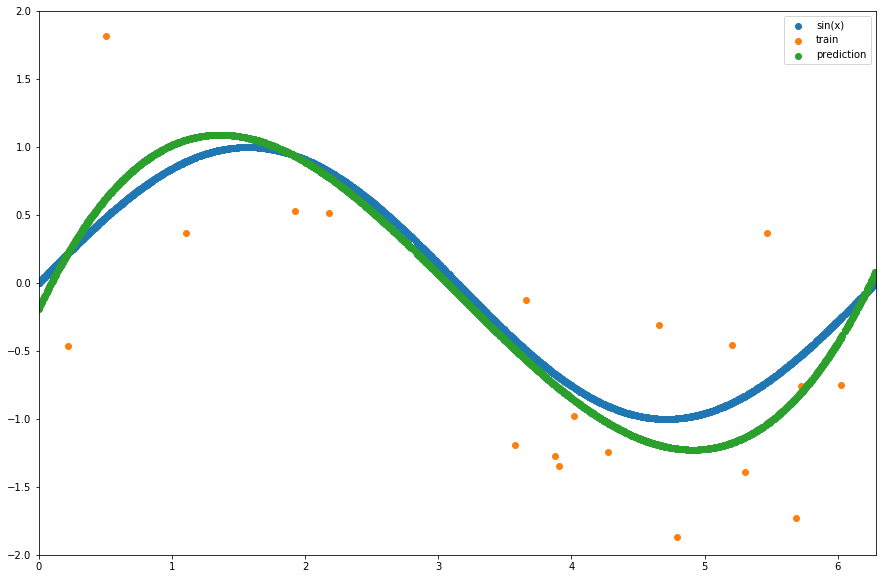

In [71]:
x_plotting = np.random.uniform(0, 2 * math.pi, 3000)
x_plotting_poly = PolynomFeatures(x_plotting[np.newaxis].T, 3)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train_3, label='train')

pred = x_plotting_poly.dot(lin_model.coef_)
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

## 5

In [73]:
X_train_7 = PolynomFeatures(x[np.newaxis].T, 7)
y_train_7 = y_train

In [74]:
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X=X_train_7, y=y_train_7)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

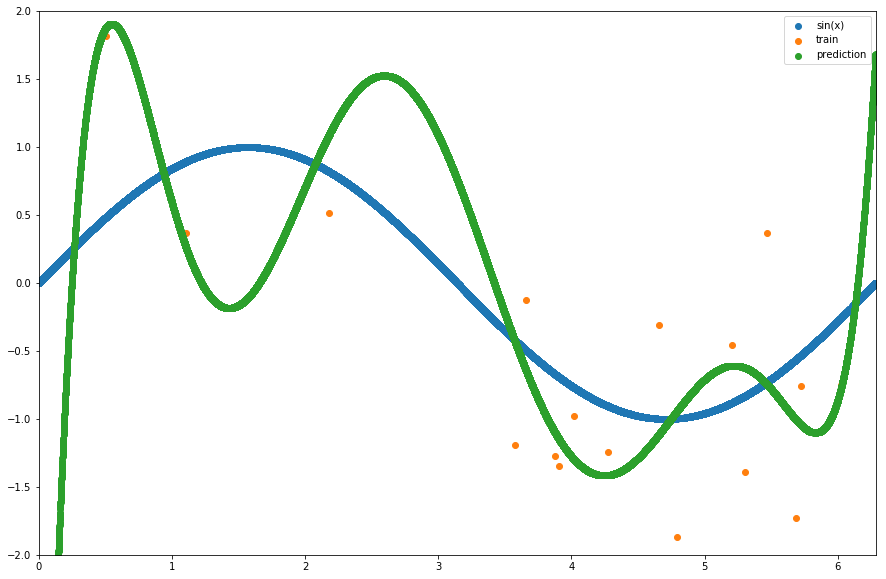

In [77]:
x_plotting = np.random.uniform(0, 2 * math.pi, 30000)
x_plotting_poly = PolynomFeatures(x_plotting[np.newaxis].T, 7)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train_7, label='train')

pred = x_plotting_poly.dot(lin_model.coef_)
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

---